In [2]:
import vvp_project_support as sup
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [ ]:
maze = sup.load_document('data/maze_2.csv')
inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
n = len(maze)
path = [[int((i-i%n)/n),int(i%n)] for i in path ]
path_matrix = sup.create_path_matrix(maze,path)

fig = plt.figure(figsize=(12, 6))
axs = fig.subplots(1, 2) 

axs[0].imshow(path_matrix, cmap = 'magma_r')
axs[1].imshow(maze, cmap = 'magma_r')
plt.show()

In [ ]:
maze = sup.load_document('data/maze_2.csv')
inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
n = len(maze)
path = [[int((i-i%n)/n),int(i%n)] for i in path ]
path_matrix = sup.create_path_matrix(maze,path)

final = maze + path_matrix
plt.figure()
cmap = plt.cm.colors.ListedColormap(['red', 'white', 'black'])
plt.imshow(final, cmap=cmap)
plt.show()

566
565
564
563
562
561
560
559
558
557
556
555
554
553
552
551
550
549
548
547
546
545
544
543
542
541
540
539
538
537
536
535
534
533
532
531
530
529
528
527
526
525
524
523
522
521
520
519
518
517
516
515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317


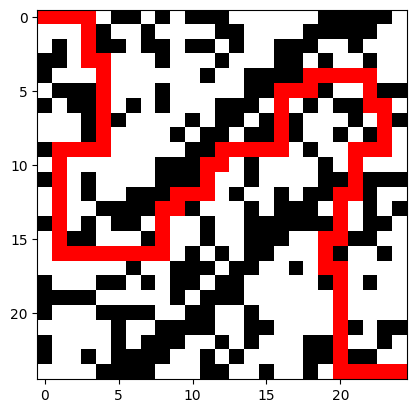

In [82]:

def generator_maze(n, shape=None):
    maze = np.ones((n,n))
    maze[0,0] = 0
    maze[n-1,n-1] = 0
    #indexy = [(i,j) for i in range(n) for j in range(n)]
    #*tretina = int(n/3)
    #*indexy = [(i,j) for i in range(n) for j in range(n) if not ((i == tretina and j<n*4/5) or (i == 2*tretina and j>n/5))]
    #*indexy = [(i,j) for i in range(n) for j in range(n) if not ((i == j-5 and j<n*4/5) or (i == j+5 and j>n/5))]
    #?indexy = [(i,j) for i in range(n) for j in range(n) if (not (i+j == n-1)) or i==0 or j==0]
    indexy = [(i,j) for i in range(n) for j in range(n) if (not(i+j in [n+5, n+6] and i>10)) and (not(i+j in [n-5, n-6] and  i<n-10))]
    
    while True:
        try: 
            inc = sup.incidence_matrix(maze)
            sup.dijkstra(inc,maze)
            break
        except:
            pos = random.randint(0,len(indexy)-1)
            i, j = indexy.pop(pos)
            maze[i,j] = 0
            print(len(indexy))
    return maze.astype(bool)

maze = generator_maze(25)

inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
n = len(maze)
path = [[int((i-i%n)/n),int(i%n)] for i in path ]
path_matrix = sup.create_path_matrix(maze,path)

final = maze + path_matrix
plt.figure()
cmap = plt.cm.colors.ListedColormap(['red', 'white', 'black'])
plt.imshow(final, cmap=cmap)
plt.show()

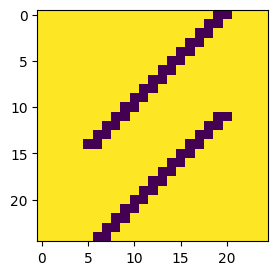

In [85]:
n = 25
indexy = []
for i in range(n):
    for j in range(n):
        if (not(i+j in [n+5, n+6] and i>10)) and (not(i+j in [n-5, n-6] and  i<n-10)):
            indexy.append((i,j))

matrix = np.zeros((n,n))
for i in range(len(indexy)):
    u,j = indexy[i]
    matrix[u,j] = 1
plt.figure(figsize=(6,3))
plt.imshow(matrix)
plt.show()